# Reinforcement Learning: Zero to Hero - Part 1/17

**Cells 1-20 of 291**



# Reinforcement Learning: Zero to Hero

## A Comprehensive Journey from Foundational Concepts to Advanced Applications

Welcome to this comprehensive Jupyter notebook on Reinforcement Learning! This notebook will guide you through a complete learning journey, starting from the basics and progressing to advanced research topics and real-world applications.

### What You'll Learn

- **Foundational Concepts**: Understanding the core principles of reinforcement learning, including MDPs, value functions, and policies
- **Core Algorithms**: Implementing and understanding key algorithms like Q-Learning, SARSA, DQN, and policy gradient methods
- **Advanced Topics**: Exploring cutting-edge techniques in reward engineering, scaling, and specialized RL methods
- **Real-World Applications**: Seeing how RL is applied in robotics, game playing, finance, healthcare, and more
- **Research & Deployment**: Understanding current research trends and how to deploy RL systems in production

### How to Use This Notebook

1. Execute cells sequentially from top to bottom
2. Read the explanations carefully before running code
3. Experiment with the code examples
4. Modify parameters to see how they affect results
5. Complete the exercises to reinforce your understanding

Let's begin your journey into the exciting world of Reinforcement Learning!

## Table of Contents

1. [Setup & Dependencies](#setup)
2. [Section 1: Foundational Concepts](#section1)
   - [Introduction to Reinforcement Learning](#intro-rl)
   - [Multi-Armed Bandit Problem](#bandits)
   - [Core Terminology and MDP Framework](#mdp)
   - [Policies and Value Functions](#policies)
   - [Dynamic Programming](#dynamic-programming)
   - [Learning Paradigms](#learning-paradigms)
3. [Section 2: Core Algorithms](#section2)
   - [Monte Carlo Methods](#monte-carlo)
   - [Temporal Difference Learning](#td-learning)
   - [Q-Learning](#q-learning)
   - [Deep Q-Networks (DQN)](#dqn)
   - [Policy Optimization Methods](#policy-optimization)
4. [Section 3: Advanced Topics](#section3)
   - [Reward Engineering](#reward-engineering)
   - [Scaling and Generalization](#scaling)
   - [Advanced Policy Methods](#advanced-policy)
   - [Specialized RL Techniques](#specialized)
5. [Section 4: Code Implementations](#section4)
   - [Bandit Algorithms](#bandit-implementations)
   - [MDP and Dynamic Programming](#mdp-implementations)
   - [Monte Carlo Methods](#mc-implementations)
   - [Temporal Difference Methods](#td-implementations)
   - [Deep RL Implementations](#deep-rl-implementations)
6. [Section 5: Real-World Applications](#section5)
   - [Traffic Signal Control](#traffic)
   - [Robotics](#robotics)
   - [Autonomous Trading](#trading)
   - [Recommendation Systems](#recommendations)
   - [Healthcare](#healthcare)
   - [Hyperparameter Tuning](#hyperparameter-tuning)
   - [Game Playing](#game-playing)
   - [Energy Management](#energy)
   - [Chess Environment](#chess)
7. [Section 6: Advanced Research & Deployment](#section6)
   - [Current Research Trends](#research-trends)
   - [Ethical and Safety Considerations](#ethics)
   - [Deployment Challenges](#deployment)
   - [End-to-End Pipeline](#pipeline)
   - [Recent Research](#recent-research)
8. [Conclusion and Next Steps](#conclusion)

<a id='setup'></a>
## Setup & Dependencies

Before we begin, we need to set up our Python environment and install the required packages. We recommend using Conda to create an isolated environment for this notebook.

### Option 1: Using Conda (Recommended)

Run the following commands in your terminal to create and activate a new conda environment:

```bash
# Create a new conda environment with Python 3.10
conda create -n rl-notebook python=3.10 -y

# Activate the environment
conda activate rl-notebook

# Install dependencies
conda install numpy matplotlib seaborn pandas -y
conda install pytorch torchvision -c pytorch -y
pip install gymnasium

# Install Jupyter to run this notebook
conda install jupyter -y
```

### Option 2: Using pip (if not using Conda)

If you prefer to use pip directly, run the cell below to install the required packages.


In [ ]:
# Install required packages using pip
# Skip this cell if you've already installed dependencies via conda

# !pip install numpy>=1.21.0 matplotlib>=3.4.0 seaborn>=0.11.0 pandas>=1.3.0
# !pip install torch>=1.10.0
# !pip install gymnasium
# !pip install scikit-learn


### Import Required Libraries

Now let's import all the libraries we'll be using throughout this notebook.

In [50]:
# Core numerical and scientific computing
import numpy as np
import pandas as pd
from collections import defaultdict, deque
import random
import time

# Visualization libraries
import matplotlib.pyplot as plt
import seaborn as sns

# Set visualization style
plt.style.use('seaborn-v0_8-darkgrid')
sns.set_palette("husl")

# Reinforcement Learning environments
import gymnasium as gym

# Deep Learning framework
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim

# Set random seeds for reproducibility
np.random.seed(42)
random.seed(42)
torch.manual_seed(42)

print("All libraries imported successfully!")

All libraries imported successfully!


### Verify Installation

Let's verify that all packages are installed correctly and check their versions.

In [4]:
# Verification cell - check all installations
import sys

def check_package(package_name, import_name=None):
    """Check if a package is installed and print its version."""
    if import_name is None:
        import_name = package_name
    
    try:
        module = __import__(import_name)
        version = getattr(module, '__version__', 'Unknown')
        print(f"✓ {package_name:20s} version: {version}")
        return True
    except ImportError:
        print(f"✗ {package_name:20s} NOT INSTALLED")
        return False

print("Checking package installations...")
print(f"Python version: {sys.version.split()[0]}")

packages = [
    ('numpy', 'numpy'),
    ('matplotlib', 'matplotlib'),
    ('seaborn', 'seaborn'),
    ('gym', 'gym'),
    ('torch', 'torch'),
    ('pandas', 'pandas')
]

all_installed = True
for package_name, import_name in packages:
    if not check_package(package_name, import_name):
        all_installed = False

print("" + "="*50)
if all_installed:
    print("✓ All packages installed successfully!")
    print("You're ready to start learning Reinforcement Learning!")
else:
    print("✗ Some packages are missing. Please install them using:")
    print("  pip install numpy matplotlib seaborn gym torch pandas")
print("="*50)

Checking package installations...
Python version: 3.13.11
✓ numpy                version: 2.4.1
✓ matplotlib           version: 3.10.8
✓ seaborn              version: 0.13.2
✗ gym                  NOT INSTALLED
✓ torch                version: 2.11.0.dev20260115+cu128
✓ pandas               version: 2.3.3
✗ Some packages are missing. Please install them using:
  pip install numpy matplotlib seaborn gym torch pandas


<a id='section1'></a>
## Section 1: Foundational Concepts

In this section, we'll build a solid foundation in reinforcement learning by exploring core concepts, starting with the simplest problems and gradually increasing complexity.

<a id='intro-rl'></a>
### Introduction to Reinforcement Learning

**What is Reinforcement Learning?**

Reinforcement Learning (RL) is a type of machine learning where an agent learns to make decisions by interacting with an environment. Unlike other machine learning paradigms, RL focuses on learning through trial and error, receiving feedback in the form of rewards or penalties.

**How RL Differs from Other Machine Learning Paradigms:**

1. **Supervised Learning**: 
   - Learns from labeled examples (input-output pairs)
   - The correct answer is provided for each training example
   - Example: Image classification, where each image has a label

2. **Unsupervised Learning**: 
   - Learns patterns from unlabeled data
   - No explicit feedback or correct answers
   - Example: Clustering customers based on purchasing behavior

3. **Reinforcement Learning**: 
   - Learns from interaction with an environment
   - Receives delayed rewards/penalties as feedback
   - Must discover which actions yield the most reward through exploration
   - Example: Teaching a robot to walk, playing chess, or optimizing ad placement

**Key Characteristics of RL:**

- **Sequential Decision Making**: Actions affect future states and rewards
- **Trial and Error**: The agent must explore to discover good strategies
- **Delayed Consequences**: Rewards may come long after the actions that caused them
- **Trade-offs**: Must balance exploration (trying new things) vs exploitation (using known good strategies)

**The RL Loop:**

The fundamental interaction pattern in RL is:

1. Agent observes the current **state** of the environment
2. Agent selects and performs an **action**
3. Environment transitions to a new **state**
4. Agent receives a **reward** signal
5. Repeat

Let's see this in action with a simple example:

In [5]:
# Simple demonstration of the RL loop
# We'll create a basic environment and agent to illustrate the interaction

class SimpleEnvironment:
    """A simple environment where the agent tries to reach a goal."""
    
    def __init__(self):
        self.position = 0  # Agent starts at position 0
        self.goal = 5      # Goal is at position 5
        self.max_steps = 10
        self.current_step = 0
    
    def reset(self):
        """Reset the environment to initial state."""
        self.position = 0
        self.current_step = 0
        return self.position
    
    def step(self, action):
        """Execute an action and return (next_state, reward, done).
        
        Args:
            action: 0 = move left, 1 = move right
        
        Returns:
            next_state: The new position
            reward: Reward for this transition
            done: Whether the episode is finished
        """
        self.current_step += 1
        
        # Update position based on action
        if action == 0:  # Move left
            self.position = max(0, self.position - 1)
        else:  # Move right
            self.position = min(10, self.position + 1)
        
        # Calculate reward
        if self.position == self.goal:
            reward = 10  # Large reward for reaching goal
            done = True
        elif self.current_step >= self.max_steps:
            reward = -5  # Penalty for taking too long
            done = True
        else:
            reward = -1  # Small penalty for each step (encourages efficiency)
            done = False
        
        return self.position, reward, done


class SimpleAgent:
    """A simple agent that takes random actions."""
    
    def select_action(self, state):
        """Select an action (randomly for now)."""
        return np.random.choice([0, 1])  # 0 = left, 1 = right


# Demonstrate the RL loop
print("Demonstrating the Reinforcement Learning Loop")
print("="*60)

env = SimpleEnvironment()
agent = SimpleAgent()

# Run one episode
state = env.reset()
total_reward = 0
step = 0

print(f"Initial State: Position = {state}, Goal = {env.goal}")

done = False
while not done:
    # Agent observes state and selects action
    action = agent.select_action(state)
    action_name = "LEFT" if action == 0 else "RIGHT"
    
    # Environment responds to action
    next_state, reward, done = env.step(action)
    
    # Track cumulative reward
    total_reward += reward
    step += 1
    
    # Display the interaction
    print(f"Step {step}:")
    print(f"  State: {state} → Action: {action_name} → Next State: {next_state}")
    print(f"  Reward: {reward:+.0f} | Total Reward: {total_reward:+.0f}")
    
    if done:
        if next_state == env.goal:
            print(f"✓ Goal reached in {step} steps!")
        else:
            print(f"✗ Failed to reach goal within {env.max_steps} steps.")
    print()
    
    state = next_state

print("="*60)
print(f"Final Total Reward: {total_reward:+.0f}")
print("This demonstrates the core RL loop:")
print("  1. Agent observes STATE")
print("  2. Agent takes ACTION")
print("  3. Environment provides REWARD and new STATE")
print("  4. Repeat until episode ends")

Demonstrating the Reinforcement Learning Loop
Initial State: Position = 0, Goal = 5
Step 1:
  State: 0 → Action: LEFT → Next State: 0
  Reward: -1 | Total Reward: -1

Step 2:
  State: 0 → Action: RIGHT → Next State: 1
  Reward: -1 | Total Reward: -2

Step 3:
  State: 1 → Action: LEFT → Next State: 0
  Reward: -1 | Total Reward: -3

Step 4:
  State: 0 → Action: LEFT → Next State: 0
  Reward: -1 | Total Reward: -4

Step 5:
  State: 0 → Action: LEFT → Next State: 0
  Reward: -1 | Total Reward: -5

Step 6:
  State: 0 → Action: RIGHT → Next State: 1
  Reward: -1 | Total Reward: -6

Step 7:
  State: 1 → Action: LEFT → Next State: 0
  Reward: -1 | Total Reward: -7

Step 8:
  State: 0 → Action: LEFT → Next State: 0
  Reward: -1 | Total Reward: -8

Step 9:
  State: 0 → Action: LEFT → Next State: 0
  Reward: -1 | Total Reward: -9

Step 10:
  State: 0 → Action: RIGHT → Next State: 1
  Reward: -5 | Total Reward: -14
✗ Failed to reach goal within 10 steps.

Final Total Reward: -14
This demonstrates

**Key Observations:**

- The agent doesn't know the optimal strategy initially
- It must learn through experience which actions lead to higher rewards
- The random agent above is inefficient - a learning agent would improve over time
- This simple example captures the essence of RL: learning to make good decisions through interaction

In the following sections, we'll explore how agents can learn optimal strategies, starting with one of the simplest RL problems: the Multi-Armed Bandit.

<a id='bandits'></a>
### Multi-Armed Bandit Problem

**What is the Multi-Armed Bandit Problem?**

Imagine you're in a casino facing a row of slot machines (also called "one-armed bandits"). Each machine has a different, unknown probability of paying out. You have a limited budget and want to maximize your total winnings. Which machines should you play?

This is the **K-Armed Bandit Problem**, one of the simplest yet most fundamental problems in reinforcement learning. It's called "K-armed" because there are K different slot machines (or "arms") to choose from.

**The Exploration-Exploitation Dilemma**

The bandit problem perfectly illustrates the core challenge in RL:

- **Exploitation**: Play the machine that has given you the best results so far (use your current knowledge)
- **Exploration**: Try other machines to see if they might be better (gather more information)

If you only exploit, you might miss out on better options you haven't tried enough. If you only explore, you waste time on machines you already know are bad. The key is finding the right balance.

**Formal Definition:**

- You have K actions (arms) to choose from
- Each action has an unknown expected reward (the "true value")
- When you select an action, you receive a reward drawn from that action's probability distribution
- Your goal: maximize the total reward over many time steps

Let's implement a simple bandit environment:

In [6]:
class MultiArmedBandit:
    """A K-armed bandit environment.
    
    Each arm has a true mean reward, and pulling an arm gives a reward
    sampled from a normal distribution around that mean.
    """
    
    def __init__(self, k=10, mean_range=(0, 1), std=1.0):
        """Initialize the bandit.
        
        Args:
            k: Number of arms
            mean_range: Range for true mean rewards
            std: Standard deviation of reward distributions
        """
        self.k = k
        self.std = std
        
        # True mean reward for each arm (unknown to the agent)
        self.true_means = np.random.uniform(mean_range[0], mean_range[1], k)
        
        # Track which arm is actually best
        self.best_arm = np.argmax(self.true_means)
        
    def pull(self, arm):
        """Pull an arm and receive a reward.
        
        Args:
            arm: Index of the arm to pull (0 to k-1)
            
        Returns:
            reward: Sampled reward from this arm's distribution
        """
        # Sample reward from normal distribution around true mean
        reward = np.random.normal(self.true_means[arm], self.std)
        return reward
    
    def get_optimal_reward(self):
        """Return the expected reward of the best arm."""
        return self.true_means[self.best_arm]


# Create a 10-armed bandit
np.random.seed(42)
bandit = MultiArmedBandit(k=10)

print("Multi-Armed Bandit Environment Created")
print("="*60)
print(f"Number of arms: {bandit.k}")
print(f"True mean rewards for each arm:")
for i, mean in enumerate(bandit.true_means):
    marker = " ← BEST" if i == bandit.best_arm else ""
    print(f"  Arm {i}: {mean:.3f}{marker}")
print(f"Optimal arm: {bandit.best_arm} (mean reward: {bandit.get_optimal_reward():.3f})")
print("Note: The agent doesn't know these true values!")
print("      It must learn them through experience.")

Multi-Armed Bandit Environment Created
Number of arms: 10
True mean rewards for each arm:
  Arm 0: 0.375
  Arm 1: 0.951 ← BEST
  Arm 2: 0.732
  Arm 3: 0.599
  Arm 4: 0.156
  Arm 5: 0.156
  Arm 6: 0.058
  Arm 7: 0.866
  Arm 8: 0.601
  Arm 9: 0.708
Optimal arm: 1 (mean reward: 0.951)
Note: The agent doesn't know these true values!
      It must learn them through experience.


#### The Greedy Strategy and Its Fatal Flaw

**What is the Greedy Strategy?**

The simplest approach to the bandit problem is the **greedy strategy**: always choose the action that has the highest estimated value based on your experience so far.

**How it works:**
1. Keep track of the average reward received from each arm
2. Always select the arm with the highest average reward
3. Update the average after each pull

**The Fatal Flaw:**

The greedy strategy can easily get stuck on a suboptimal arm! Here's why:

- Suppose you try arm 3 first and get lucky with a high reward
- Now arm 3 has the highest estimated value
- The greedy strategy will keep choosing arm 3 forever
- You'll never discover that arm 7 is actually better!

This is called **premature convergence** - the agent stops exploring too early and misses better options.

Let's implement a greedy agent and see this problem in action:

In [7]:
class GreedyAgent:
    """An agent that always selects the arm with highest estimated value."""
    
    def __init__(self, k):
        """Initialize the agent.
        
        Args:
            k: Number of arms
        """
        self.k = k
        self.q_estimates = np.zeros(k)  # Estimated value of each arm
        self.action_counts = np.zeros(k)  # Number of times each arm was pulled
        
    def select_action(self):
        """Select the arm with highest estimated value (greedy)."""
        # Break ties randomly
        max_value = np.max(self.q_estimates)
        best_arms = np.where(self.q_estimates == max_value)[0]
        return np.random.choice(best_arms)
    
    def update(self, action, reward):
        """Update estimates after receiving a reward.
        
        Uses incremental average formula:
        NewEstimate = OldEstimate + (1/n) * (Reward - OldEstimate)
        """
        self.action_counts[action] += 1
        n = self.action_counts[action]
        
        # Incremental update of average
        self.q_estimates[action] += (1/n) * (reward - self.q_estimates[action])


def run_experiment(agent, bandit, steps=1000):
    """Run an experiment with an agent on a bandit.
    
    Returns:
        rewards: Array of rewards received at each step
        optimal_actions: Array indicating if optimal action was chosen
    """
    rewards = np.zeros(steps)
    optimal_actions = np.zeros(steps)
    
    for t in range(steps):
        # Agent selects action
        action = agent.select_action()
        
        # Environment provides reward
        reward = bandit.pull(action)
        
        # Agent updates its estimates
        agent.update(action, reward)
        
        # Track results
        rewards[t] = reward
        optimal_actions[t] = 1 if action == bandit.best_arm else 0
    
    return rewards, optimal_actions


# Demonstrate the greedy strategy's failure
print("Demonstrating the Greedy Strategy")
print("="*60)

np.random.seed(42)
bandit = MultiArmedBandit(k=10)
greedy_agent = GreedyAgent(k=10)

rewards, optimal_actions = run_experiment(greedy_agent, bandit, steps=1000)

print(f"After 1000 steps:")
print(f"Arm selection counts:")
for i in range(bandit.k):
    count = greedy_agent.action_counts[i]
    estimate = greedy_agent.q_estimates[i]
    true_value = bandit.true_means[i]
    marker = " ← OPTIMAL" if i == bandit.best_arm else ""
    print(f"  Arm {i}: pulled {count:4.0f} times | "
          f"estimated value: {estimate:6.3f} | true value: {true_value:6.3f}{marker}")

optimal_pct = np.mean(optimal_actions) * 100
avg_reward = np.mean(rewards)
optimal_reward = bandit.get_optimal_reward()

print(f"Performance:")
print(f"  Optimal action selected: {optimal_pct:.1f}% of the time")
print(f"  Average reward: {avg_reward:.3f}")
print(f"  Optimal reward: {optimal_reward:.3f}")
print(f"  Regret: {optimal_reward - avg_reward:.3f}")

print(f"⚠️  Notice: The greedy agent likely got stuck on a suboptimal arm!")
print(f"    It stopped exploring and missed the best option.")

Demonstrating the Greedy Strategy
After 1000 steps:
Arm selection counts:
  Arm 0: pulled    0 times | estimated value:  0.000 | true value:  0.375
  Arm 1: pulled    0 times | estimated value:  0.000 | true value:  0.951 ← OPTIMAL
  Arm 2: pulled  995 times | estimated value:  0.773 | true value:  0.732
  Arm 3: pulled    0 times | estimated value:  0.000 | true value:  0.599
  Arm 4: pulled    0 times | estimated value:  0.000 | true value:  0.156
  Arm 5: pulled    5 times | estimated value: -0.047 | true value:  0.156
  Arm 6: pulled    0 times | estimated value:  0.000 | true value:  0.058
  Arm 7: pulled    0 times | estimated value:  0.000 | true value:  0.866
  Arm 8: pulled    0 times | estimated value:  0.000 | true value:  0.601
  Arm 9: pulled    0 times | estimated value:  0.000 | true value:  0.708
Performance:
  Optimal action selected: 0.0% of the time
  Average reward: 0.769
  Optimal reward: 0.951
  Regret: 0.182
⚠️  Notice: The greedy agent likely got stuck on a subo

#### Visualizing the Greedy Strategy's Failure

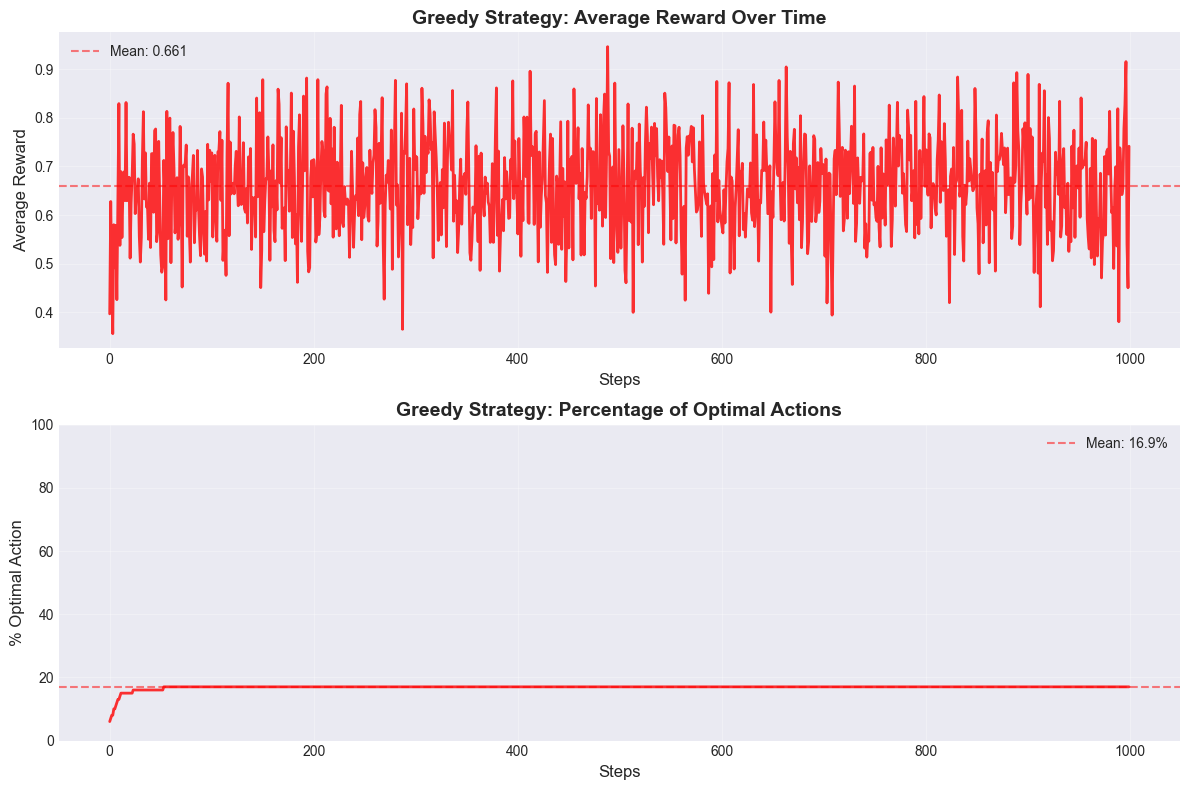

📊 Interpretation:
   - The greedy strategy quickly settles on an arm (often suboptimal)
   - It rarely selects the optimal action because it stopped exploring
   - Performance plateaus early and doesn't improve
   - This demonstrates why pure exploitation fails!


In [8]:
# Run multiple experiments to see the pattern
num_experiments = 100
steps = 1000

all_rewards = np.zeros((num_experiments, steps))
all_optimal = np.zeros((num_experiments, steps))

np.random.seed(42)
for i in range(num_experiments):
    bandit = MultiArmedBandit(k=10)
    agent = GreedyAgent(k=10)
    rewards, optimal = run_experiment(agent, bandit, steps)
    all_rewards[i] = rewards
    all_optimal[i] = optimal

# Calculate averages across experiments
avg_rewards = np.mean(all_rewards, axis=0)
avg_optimal = np.mean(all_optimal, axis=0)

# Create visualization
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12, 8))

# Plot 1: Average reward over time
ax1.plot(avg_rewards, linewidth=2, color='red', alpha=0.8)
ax1.set_xlabel('Steps', fontsize=12)
ax1.set_ylabel('Average Reward', fontsize=12)
ax1.set_title('Greedy Strategy: Average Reward Over Time', fontsize=14, fontweight='bold')
ax1.grid(True, alpha=0.3)
ax1.axhline(y=np.mean(avg_rewards), color='red', linestyle='--', alpha=0.5, label=f'Mean: {np.mean(avg_rewards):.3f}')
ax1.legend()

# Plot 2: Percentage of optimal actions
ax2.plot(avg_optimal * 100, linewidth=2, color='red', alpha=0.8)
ax2.set_xlabel('Steps', fontsize=12)
ax2.set_ylabel('% Optimal Action', fontsize=12)
ax2.set_title('Greedy Strategy: Percentage of Optimal Actions', fontsize=14, fontweight='bold')
ax2.grid(True, alpha=0.3)
ax2.axhline(y=np.mean(avg_optimal) * 100, color='red', linestyle='--', alpha=0.5, 
            label=f'Mean: {np.mean(avg_optimal)*100:.1f}%')
ax2.legend()
ax2.set_ylim([0, 100])

plt.tight_layout()
plt.show()

print("📊 Interpretation:")
print("   - The greedy strategy quickly settles on an arm (often suboptimal)")
print("   - It rarely selects the optimal action because it stopped exploring")
print("   - Performance plateaus early and doesn't improve")
print("   - This demonstrates why pure exploitation fails!")

#### The Epsilon-Greedy Algorithm

**A Simple Solution to the Exploration-Exploitation Dilemma**

The epsilon-greedy algorithm provides a simple yet effective solution to the greedy strategy's fatal flaw. Instead of always exploiting, it introduces controlled exploration.

**How Epsilon-Greedy Works:**

With probability $\epsilon$ (epsilon): Choose a **random** action (explore)

With probability $1 - \epsilon$: Choose the **best known** action (exploit)

**Mathematical Formulation:**

$$
A_t = \begin{cases}
\text{random action} & \text{with probability } \epsilon \\
\arg\max_a Q_t(a) & \text{with probability } 1 - \epsilon
\end{cases}
$$

where $Q_t(a)$ is the estimated value of action $a$ at time $t$.

**Key Parameters:**

- $\epsilon = 0$: Pure exploitation (greedy strategy)
- $\epsilon = 1$: Pure exploration (random selection)
- $\epsilon = 0.1$: A common choice - explore 10% of the time

**Advantages:**
- Simple to implement
- Guarantees all actions are tried infinitely often (in the limit)
- Balances exploration and exploitation

**Trade-offs:**
- Explores uniformly (doesn't prioritize promising actions)
- Continues exploring even after finding the best action
- Choice of $\epsilon$ affects performance

Let's implement the epsilon-greedy algorithm:

In [9]:
class EpsilonGreedyAgent:
    """An agent that uses epsilon-greedy action selection."""
    
    def __init__(self, k, epsilon=0.1):
        """Initialize the agent.
        
        Args:
            k: Number of arms
            epsilon: Probability of random exploration (0 to 1)
        """
        self.k = k
        self.epsilon = epsilon
        self.q_estimates = np.zeros(k)  # Estimated value of each arm
        self.action_counts = np.zeros(k)  # Number of times each arm was pulled
        
    def select_action(self):
        """Select action using epsilon-greedy strategy."""
        if np.random.random() < self.epsilon:
            # Explore: choose random action
            return np.random.randint(0, self.k)
        else:
            # Exploit: choose best known action
            max_value = np.max(self.q_estimates)
            best_arms = np.where(self.q_estimates == max_value)[0]
            return np.random.choice(best_arms)
    
    def update(self, action, reward):
        """Update estimates after receiving a reward."""
        self.action_counts[action] += 1
        n = self.action_counts[action]
        
        # Incremental update of average
        self.q_estimates[action] += (1/n) * (reward - self.q_estimates[action])


# Test epsilon-greedy with different epsilon values
print("Epsilon-Greedy Algorithm Demonstration")
print("="*60)

np.random.seed(42)
bandit = MultiArmedBandit(k=10)

epsilon_values = [0.0, 0.01, 0.1, 0.3]
results = {}

for eps in epsilon_values:
    agent = EpsilonGreedyAgent(k=10, epsilon=eps)
    rewards, optimal_actions = run_experiment(agent, bandit, steps=1000)
    
    results[eps] = {
        'rewards': rewards,
        'optimal': optimal_actions,
        'avg_reward': np.mean(rewards),
        'optimal_pct': np.mean(optimal_actions) * 100
    }
    
    print(f"ε = {eps:.2f}:")
    print(f"  Average reward: {results[eps]['avg_reward']:.3f}")
    print(f"  Optimal action: {results[eps]['optimal_pct']:.1f}% of the time")

print("" + "="*60)
print("💡 Key Insight:")
print("   - ε = 0.0 (greedy) gets stuck on suboptimal actions")
print("   - Small ε values (0.01-0.1) balance exploration and exploitation well")
print("   - Large ε values (0.3) explore too much and waste opportunities")

Epsilon-Greedy Algorithm Demonstration
ε = 0.00:
  Average reward: 1.002
  Optimal action: 100.0% of the time
ε = 0.01:
  Average reward: 0.918
  Optimal action: 95.4% of the time
ε = 0.10:
  Average reward: 0.860
  Optimal action: 80.4% of the time
ε = 0.30:
  Average reward: 0.713
  Optimal action: 37.6% of the time
💡 Key Insight:
   - ε = 0.0 (greedy) gets stuck on suboptimal actions
   - Small ε values (0.01-0.1) balance exploration and exploitation well
   - Large ε values (0.3) explore too much and waste opportunities
